In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BceqSf5GpC00M7V9LznB")
project = rf.workspace("qamars-workplace").project("store-shelves-images")
version = project.version(6)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 41.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bi

In [6]:
import os

os.listdir("/kaggle/working")

['Store-Shelves-Images-4',
 'Store-Shelves-Images-2',
 '.virtual_documents',
 'Store-Shelves-Images-6',
 'yolo_runs',
 'yolo11n.pt',
 'yolo11m.pt']

In [7]:
os.listdir("/kaggle/working/Store-Shelves-Images-6")

['README.roboflow.txt', 'test', 'data.yaml', 'valid', 'train']

In [8]:
data_yaml_path = "/kaggle/working/Store-Shelves-Images-6/data.yaml"

updated_yaml = """
path: /kaggle/working/Store-Shelves-Images-6

train: train/images
val: valid/images
test: test/images

nc: 4
names:
  - afia
  - nakheel
  - noor
  - shams
"""

with open(data_yaml_path, "w") as f:
    f.write(updated_yaml)

print("✅ data.yaml updated correctly for Kaggle")


✅ data.yaml updated correctly for Kaggle


In [9]:
import glob

print("Train images:", len(glob.glob("/kaggle/working/Store-Shelves-Images-6/train/images/*")))
print("Train labels:", len(glob.glob("/kaggle/working/Store-Shelves-Images-6/train/labels/*")))

print("Valid images:", len(glob.glob("/kaggle/working/Store-Shelves-Images-6/valid/images/*")))
print("Valid labels:", len(glob.glob("/kaggle/working/Store-Shelves-Images-6/valid/labels/*")))

Train images: 175
Train labels: 175
Valid images: 7
Valid labels: 7


In [10]:
!pip install ultralytics
from ultralytics import YOLO
import torch

In [11]:
# Load a COCO-pretrained YOLO11m model
model = YOLO("yolo11m.pt")

# Define device explicitly
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model.train(
    data="/kaggle/working/Store-Shelves-Images-6/data.yaml",
    epochs=100,           # You can increase for v11
    patience=15,
    imgsz=640,
    batch=6,
    device=device,
    workers=2,
    project="/kaggle/working/yolo_runs",
    name="store_shelves_yolo11m"
)

Using device: cuda
Ultralytics 8.3.245 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Store-Shelves-Images-6/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=store_shelves_yolo11m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c694ff75400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Model loaded successfully

image 1/1 /kaggle/input/yolotest/4182_1766475567364.jpg: 640x480 9 afias, 14 nakheels, 10 shamss, 28.4ms
Speed: 2.9ms preprocess, 28.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


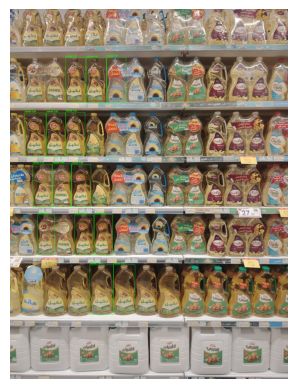

In [32]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load Model
model_path = "/kaggle/working/yolo_runs/store_shelves_yolo11m/weights/best.pt"
model = YOLO(model_path)
print("Model loaded successfully")

# Making Prediction
results = model.predict(
    source="/kaggle/input/yolotest/4182_1766475567364.jpg",
    conf=0.25,
    save=False
)

# Filter only one class from an image
TARGET_CLASS = "nakheel"

filtered_boxes = []

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    class_name = model.names[cls_id]

    if class_name == TARGET_CLASS:
        filtered_boxes.append(box)


# Displaying Image
img = results[0].orig_img.copy()

for box in filtered_boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])

    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.putText(
        img,
        f"{TARGET_CLASS} {conf:.2f}",
        (x1, y1-10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0,255,0),
        2
    )

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# Read all images from directory and getting predictions on them.

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing images
img_dir = "/kaggle/input/yolotest/"
img_extensions = (".jpg", ".jpeg", ".png")  # add more if needed

# Get all image paths in the directory
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.lower().endswith(img_extensions)]

# Loop through all images
for img_path in img_paths:
    # Predict on single image
    results = model.predict(source=img_path, conf=0.3, save=False)

    # Get annotated image (BGR)
    annotated_img = results[0].plot()

    # Convert BGR -> RGB for matplotlib
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Display
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img_rgb)
    plt.axis("off")
    plt.title(os.path.basename(img_path))
    plt.show()


# Color fixed

In [ ]:
import matplotlib.pyplot as plt
import cv2  # for color conversion

annotated_img = results[0].plot()  # BGR

# Convert BGR -> RGB
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(annotated_img_rgb)
plt.axis("off")
plt.show()